In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# generating synthetic training data                                                                                                              
Xtrain = np.array([-4,-3,-2,-1,1,3])
Xtrain=Xtrain.reshape(len(Xtrain),1)
ytrain = np.sin(Xtrain)

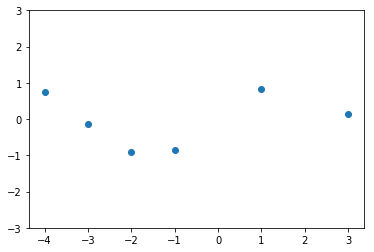

In [48]:
plt.scatter(Xtrain, ytrain)
plt.ylim(-3,3)
plt.show()

In [60]:
#generate a grid of test points
n = 50
Xtest = np.linspace(-5,5,n).reshape(-1,1)

## build the GP

In [7]:
# define kernel function
def kernel(a,b,bw):
    sqdist = np.sum(a**2,1).reshape(-1,1)+ np.sum(b**2,1) -2*a.dot(b.T)
    return np.exp(-sqdist/2./bw)

In [12]:
# fix the bandwidth
bandwidth=1.

In [13]:
# obtaining K_**: covariance matrix of the function values at test points                                                                                                                                  
K_ss = kernel(Xtest,Xtest,bandwidth)
L_ss = np.linalg.cholesky(K_ss + 1.E-6*np.eye(n))

### plot 10 prior functions

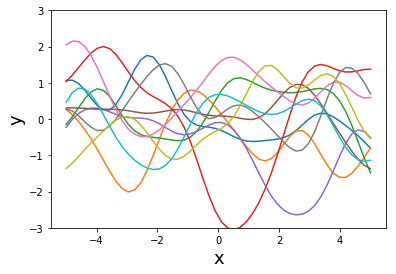

In [65]:
n_samples = 10
f_prior = np.dot(L_ss,np.random.normal(size=(n,n_samples)))

plt.plot(Xtest,f_prior)                                                                                                                           
plt.ylim(-3,3)                                                                                                                                    
plt.xlabel('x',fontsize=18)                                                                                                                       
plt.ylabel('y',fontsize=18)
plt.show()

In [50]:
f_prior.shape

(50, 10)

In [43]:
# Obtaining K and K_* : further elements of the block covariance                                                                                                             
K = kernel(Xtrain,Xtrain,bandwidth)
K_s = kernel(Xtrain,Xtest,bandwidth)

### build posterior predictive mean and variance

In [44]:
# vector of mean at test points                                                                                                                   
mu = np.dot(K_s.T,np.dot(np.linalg.inv(K),ytrain))

In [45]:
# variance at test points
Var= K_ss - np.dot(K_s.T,np.dot(np.linalg.inv(K),K_s))

#standard deviation
std=np.sqrt(np.diag(Var))

### plot 10 posterior functions

In [46]:
n_samples = 10

# Cholesky of the posterior
L = np.linalg.cholesky(Var +  1.E-6*np.eye(n))

# samples
f_post = mu + np.dot(L,np.random.normal(size=(n,n_samples)))


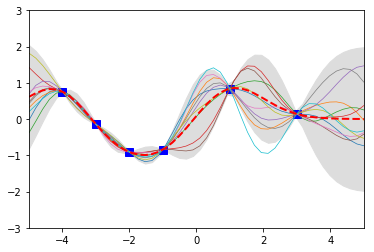

In [59]:
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post, lw=0.7)
plt.fill_between(Xtest.flatten(), mu.flatten()-2*std, mu.flatten()+2*std, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2, color='red')
plt.axis([-5, 5, -3, 3])
plt.show()